#####  This notebook presents an end-to-end credit default risk modeling project using application-stage loan data. 
##### The focus is on understanding risk drivers, engineering economically meaningful features, and evaluating models
#####  using ranking-based metrics such as ROC-AUC and risk deciles rather than raw accuracy.

In [4]:
import pandas as pd
df=pd.read_csv("C:\\Users\\aashu\\OneDrive\\Desktop\\Downloads\\archive (4)\\HC_application_train.csv")

# Understanding Data

In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print(df.shape)
print('\n')
print(df.columns)

(307511, 122)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [13]:
print(df['TARGET'].value_counts(normalize=True))

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


#### Dataset heavily imbalanced class so accuracy metric ruled out 

In [16]:
pd.set_option('display.max_columns', None)

In [18]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
154030,278517,0,Cash loans,F,N,Y,1,225000.0,522396.0,38142.0,472500.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-13868,-693,-5969.0,-4212,NaN,1,1,0,1,0,0,Sales staff,3.0,1,1,WEDNESDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.446209,0.711805,0.275000,0.3701,0.1793,0.9851,0.796,0.0863,0.64,0.2759,0.4583,0.5,0.0000,0.3001,0.3369,0.0077,0.004,0.3771,0.186,0.9851,0.804,0.0871,0.6445,0.2759,0.4583,0.5,0.000,0.3278,0.3510,0.0078,0.0042,0.3737,0.1793,0.9851,0.7987,0.0868,0.64,0.2759,0.4583,0.5,0.0000,0.3053,0.3430,0.0078,0.0041,NaN,block of flats,0.2659,Panel,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
301303,449064,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Higher education,Single / not married,Municipal apartment,0.007114,-18264,-8039,-8098.0,-1812,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,TUESDAY,11,0,0,0,0,0,0,School,0.802902,0.663095,0.295583,0.0320,NaN,0.9762,NaN,NaN,NaN,0.0690,0.1250,NaN,0.0225,NaN,0.0159,NaN,NaN,0.0326,NaN,0.9762,NaN,NaN,NaN,0.0690,0.1250,NaN,0.023,NaN,0.0166,NaN,NaN,0.0323,NaN,0.9762,NaN,NaN,NaN,0.0690,0.1250,NaN,0.0229,NaN,0.0162,NaN,NaN,NaN,block of flats,0.0199,"Stone, brick",No,2.0,1.0,2.0,0.0,-574.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
87557,201623,0,Cash loans,M,N,Y,0,180000.0,599472.0,30739.5,517500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-15631,-1523,-1412.0,-3958,NaN,1,1,0,1,1,0,Laborers,2.0,2,2,SATURDAY,13,0,0,0,0,1,1,Business Entity Type 3,NaN,0.574530,0.788681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## This dataset represents historical loan applicants along with their repayment outcomes.
    The goal is to understand how risky a customer is at application time, i.e., the probability that they will default in the future.
    By analyzing how features differ between customers who repaid their loans and those who defaulted, we can answer the core business question:
    If a new customer applies today with similar characteristics, how risky are they likely to be?

    The dataset contains around 120 features and one target variable (TARGET).
    The target distribution is heavily imbalanced, with approximately 92% non-defaulters and 8% defaulters.
    Because of this imbalance, accuracy is not a reliable evaluation metric, as a model can achieve high accuracy by predicting all customers as non-        defaulters.

    From a risk perspective, missing a defaulter (false negative) is more costly than incorrectly flagging a safe customer (false positive).
    Therefore, recall on the defaulter class is more important than precision in this problem.

    To handle class imbalance:
    A stratified train-test split is required to preserve class proportions
    Using class_weight='balanced' is a reasonable choice to penalize misclassification of the minority class
    Resampling techniques are avoided at this stage to keep the data distribution intact

# Feature Understanding & Feature Grouping

## With more than 120 features, analyzing all columns together would be inefficient and unclear.
    To make analysis manageable and meaningful, features are grouped based on domain understanding and risk logic.
    
    The following feature categories are defined:
    Identity & Demographics – who the customer is
    
    Repayment Capacity & Income Stability – whether the customer can realistically repay the loan
    
    Assets & Wealth – financial buffers available to the customer
    
    Housing Quality & Living Conditions – proxy for socio-economic stability
    
    Credit History & External Risk – past financial behavior and external risk signals
    
    Contactability & Digital Stability – how reachable and traceable the customer is
    
    Address & Work Location Consistency – residential and employment stability
    
    This grouping allows focused EDA on each risk dimension.
    The outcome of this step is to identify which feature groups provide strong signals,
    which are supporting signals, and which are weak or noisy, helping prioritize features during modeling.


## The plan is simple i will make 8 dataframes then i will inspect each dataframe individually extract patterns do feature engineering
## dealing with missing values all that eda stuff

# 1] Idendity and Demographics

In [24]:
identity_columns = ['SK_ID_CURR','DAYS_BIRTH' , 'CODE_GENDER' , 'NAME_FAMILY_STATUS' 
                    , 'NAME_EDUCATION_TYPE' , 'CNT_CHILDREN']
df_identity = df[identity_columns].copy()

In [26]:
df_identity.sample(5)

,SK_ID_CURR,DAYS_BIRTH,CODE_GENDER,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,CNT_CHILDREN
15334,117899,-14969,F,Married,Secondary / secondary special,0
136029,257782,-24334,F,Single / not married,Secondary / secondary special,0
235288,372541,-18362,F,Married,Secondary / secondary special,0
298653,445994,-11898,M,Civil marriage,Secondary / secondary special,1
215569,349780,-19591,M,Married,Secondary / secondary special,0


In [28]:
df_identity.shape

(307511, 6)

In [30]:
# making age column using Days_birth
df_identity['AGE'] = abs(df_identity['DAYS_BIRTH'])/365
df_identity['AGE'] = df_identity['AGE'].astype('int')

In [32]:
# now dropping days_birth column
df_identity = df_identity.drop(columns=['DAYS_BIRTH'])

In [34]:
df_identity.isna().sum()

SK_ID_CURR             0
CODE_GENDER            0
NAME_FAMILY_STATUS     0
NAME_EDUCATION_TYPE    0
CNT_CHILDREN           0
AGE                    0
dtype: int64

In [36]:
## fortunately no missing values found

In [38]:
print(df_identity['CODE_GENDER'].value_counts())
print('\n')
print(df_identity['NAME_FAMILY_STATUS'].value_counts())
print('\n')
print(df_identity['NAME_EDUCATION_TYPE'].value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


In [40]:
## in the eduaction_type there is huge imbalance merging academic_degree+secondary specail is good idea
## merging lower secondary + incomplete higher so we will left with three types

In [42]:
education_mapping = {
    'Lower secondary' : 'Low Education',
    'Incomplete higher' : 'Low Education',
    'Secondary / secondary special' : 'Medium Education',
    'Higher education' : 'Higher Education',
    'Academic degree' : 'Higher Education'
}

df_identity['EDUCATION GROUP'] = df_identity['NAME_EDUCATION_TYPE'].replace(education_mapping)

In [44]:
# now again dropping NAME_EDUCATION_TYPE COLUMN
df_identity = df_identity.drop(columns=['NAME_EDUCATION_TYPE'])

In [46]:
## merging categories of family status 
family_merging = {
    'Married' : 'Partnered',
    'Civil marriage' : 'Partnered',
    'Single / not married' : 'Single',
    'Separated' : 'Separated',
    'Widow' : 'Widow'
}

df_identity['FAMILY_STATUS'] = df_identity['NAME_FAMILY_STATUS'].replace(family_merging)

In [48]:
df_identity = df_identity.drop(columns=['NAME_FAMILY_STATUS'])

In [50]:
df_identity.sample(5)

,SK_ID_CURR,CODE_GENDER,CNT_CHILDREN,AGE,EDUCATION GROUP,FAMILY_STATUS
290200,436199,F,0,23,Medium Education,Partnered
92025,206864,F,0,23,Higher Education,Partnered
149437,273256,F,2,32,Medium Education,Partnered
153609,278039,M,0,36,Medium Education,Separated
184978,314427,M,2,28,Higher Education,Partnered


In [52]:
# plotting bar chart for three categorical data
gender_counts = df_identity['CODE_GENDER'].value_counts()
education_counts = df_identity['EDUCATION GROUP'].value_counts()
family_counts = df_identity['FAMILY_STATUS'].value_counts()

In [54]:
import matplotlib.pyplot as plt

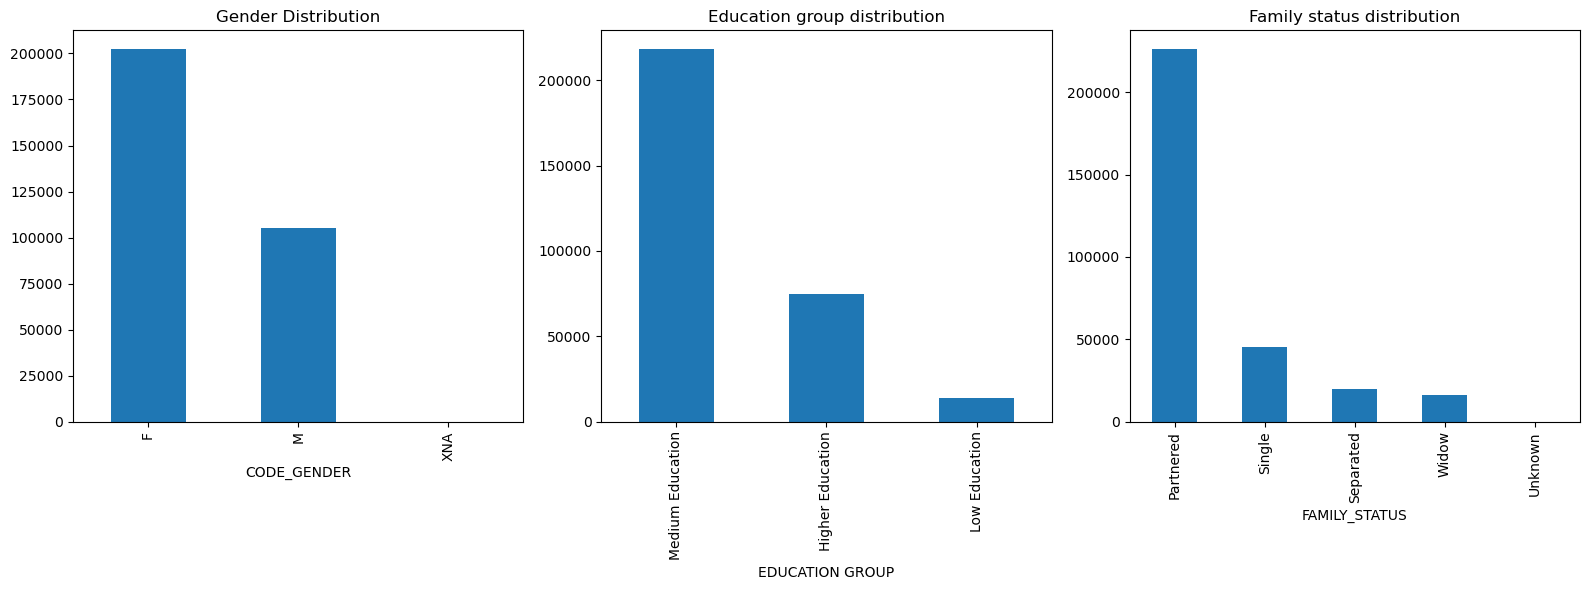

In [55]:
fig , axes = plt.subplots(1,3 , figsize=(16,6))

gender_counts.plot(kind='bar' , ax=axes[0])
axes[0].set_title("Gender Distribution")

education_counts.plot(kind='bar' , ax=axes[1])
axes[1].set_title("Education group distribution")

family_counts.plot(kind='bar' , ax = axes[2])
axes[2].set_title("Family status distribution")

plt.tight_layout()
plt.show()


<Axes: xlabel='AGE', ylabel='Count'>

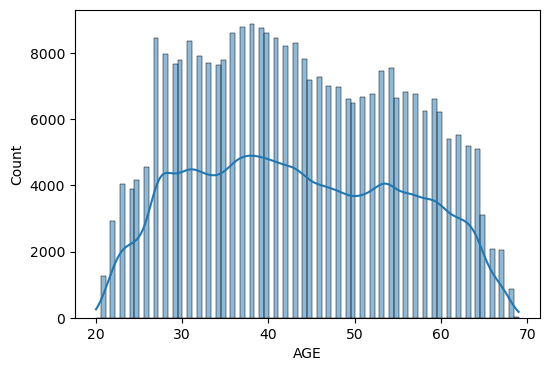

In [56]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df_identity['AGE'] , kde=True)

In [59]:
df_identity['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
9          2
8          2
10         2
12         2
19         2
11         1
Name: count, dtype: int64

In [60]:
# again this needs to be converted into buckets
df_identity['CNT CHILDREN']= df_identity['CNT_CHILDREN'].apply(
    lambda x: '0' if x==0 else ('1-2' if x<= 2 else '3+')
)

In [61]:
df_identity = df_identity.drop(columns=['CNT_CHILDREN'])

In [62]:
df_identity.sample(5)

,SK_ID_CURR,CODE_GENDER,AGE,EDUCATION GROUP,FAMILY_STATUS,CNT CHILDREN
148349,272007,F,52,Medium Education,Partnered,0
27263,131683,F,46,Medium Education,Partnered,0
306931,455602,M,46,Low Education,Widow,1-2
137330,259270,F,58,Medium Education,Partnered,0
148536,272222,F,37,Higher Education,Single,0


## The customer base is dominated by female applicants, with roughly two-thirds of customers being female.
    Approximately 75% of applicants are married, while the remaining customers are single, separated, or widowed.
    
    In terms of education:
    
    Around 24% of customers have higher education
    
    Roughly 71% have secondary education
    
    A small fraction did not complete formal education
    
    These variables primarily describe life stage and background, and on their own are not strong predictors of default risk, but they may interact with     other features such as income stability and employment.
    
    Decision: Demographic features are treated as contextual variables, not primary risk drivers.

# 2] Repayment Capacity & Income Stability

In [404]:
repayment_columns = ['SK_ID_CURR' ,'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' , 
                     'ORGANIZATION_TYPE' , 'DAYS_EMPLOYED' , 'OCCUPATION_TYPE']
df_repayment = df[repayment_columns].copy()

In [65]:
df_repayment.sample(5)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,ORGANIZATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE
8332,112500.0,813195.0,31779.0,702000.0,Industry: type 3,-388,Laborers
46515,225000.0,454500.0,46701.0,454500.0,Business Entity Type 3,-1165,NaN
111026,225000.0,544068.0,25492.5,382500.0,Self-employed,-4129,Laborers
306993,148500.0,675000.0,18693.0,675000.0,Government,-922,Managers
260162,112500.0,199152.0,9711.0,135000.0,XNA,365243,NaN


In [66]:
df_repayment.isna().sum()

AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             12
AMT_GOODS_PRICE        278
ORGANIZATION_TYPE        0
DAYS_EMPLOYED            0
OCCUPATION_TYPE      96391
dtype: int64

In [67]:
print(df_repayment['ORGANIZATION_TYPE'].value_counts())
print('\n')
print(df_repayment['DAYS_EMPLOYED'].value_counts())
print('\n')
print(df_repayment['OCCUPATION_TYPE'].value_counts())

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [68]:
# in organization there is high cardinality and 'xna' means not applicable not employed 
# also in days employed no 365243 appears 55k meaning they are unemployed they don't have current job
# occupation type is acutally clean with less cardinality later i can make an column is_employed

In [69]:
pd.options.display.float_format = '{:,.2f}'.format

In [70]:
df_repayment[['AMT_INCOME_TOTAL' ,'AMT_CREDIT' , 'AMT_ANNUITY' ,'AMT_GOODS_PRICE']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,"307,511.00","307,511.00","307,499.00","307,233.00"
mean,"168,797.92","599,026.00","27,108.57","538,396.21"
std,"237,123.15","402,490.78","14,493.74","369,446.46"
min,"25,650.00","45,000.00","1,615.50","40,500.00"
25%,"112,500.00","270,000.00","16,524.00","238,500.00"
50%,"147,150.00","513,531.00","24,903.00","450,000.00"
75%,"202,500.00","808,650.00","34,596.00","679,500.00"
max,"117,000,000.00","4,050,000.00","258,025.50","4,050,000.00"


In [71]:
## one thing is pretty much same which is mean is greater than median everywhere it tells that the data 
## is right skewed we gonna plot this 

## amt_income_total = here median is 1.47 lac and 75 percent of people earn less than 2 lac
                      # max is 11.7crore it means it is heavly right skewed gotta deal with it 

## amt_credit = median loan amount is 5 lac and 75 percent of users takes loan with amount less than 
                # equal to 8lac and max is 40 lac which is outlier again it is right skewed

## amt_annuilty = median annuilty is 24k and 75 perdcent of people pay less than or equal to 34k annually to the bank
                 # max is 2.58 lac it is also has some outlier but its fine not much or bigger range 

## amt_goods_price = median is 4.5lac meaning 50 percent of people buy things worth 4.5 lac or less than that 
                     # one thing to notice is that median_income is 1.47 lac and mediam_good_purchase is 4.5 lac which is 
                     # three times of median_income

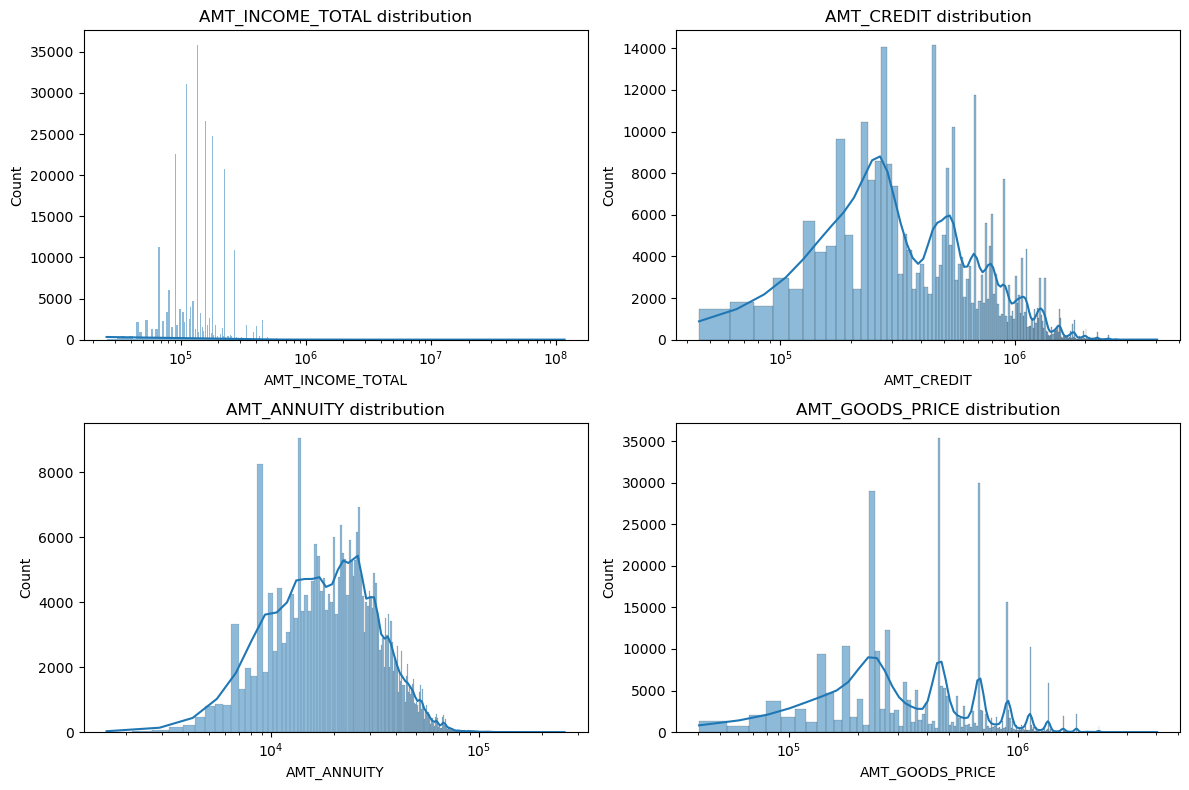

In [85]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY' , 'AMT_GOODS_PRICE']

fig , axes = plt.subplots (2,2 , figsize=(12,8))
axes = axes.flatten()
for i , col in enumerate(cols):
    sns.histplot(df_repayment[col] , ax=axes[i] , kde=True)
    axes[i].set_xscale('log')
    axes[i].set_title(f"{col} distribution")
plt.tight_layout()
plt.show()

In [86]:
# amt_income_total is heavily skewed i mean most of the numers are in tenthousand range and very few goes till tencrores range
# this means we would need to transform into log or some kind of transformation as it is right skewed log is good

# amt_credit and amt_annuilty is skewed but not that much so amt_creidt has multi modality they both are good numeric feature

# amt_goods_price has multi modality 
# These variables are log-normal–like, not normal. Raw scale modeling would be a mistake.

In [87]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY' , 'AMT_GOODS_PRICE']

In [88]:
df_repayment[cols].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.00,0.16,0.19,0.16
AMT_CREDIT,0.16,1.00,0.77,0.99
AMT_ANNUITY,0.19,0.77,1.00,0.78
AMT_GOODS_PRICE,0.16,0.99,0.78,1.00


In [89]:
## i am going to make new features using these 4 features (basically taking ratios)
## while making ratios put the cost/burden in the numerator and the capacity/ability/resource in denominator

In [90]:
## Feature creation that will be part of the model should live inside the pipeline, which is fit on train only.
## so before modeling i will drop these ratio columns because now my motive is onnly to explore 

In [91]:
# first engineered column (repayment_burder_ratio)
# the higher the ratio the higher the burden 

In [408]:
df_repayment['repayment_burden_ratio'] = df_repayment['AMT_ANNUITY']/df_repayment['AMT_INCOME_TOTAL']

In [410]:
# second engineered column (LOAN_TO_GOODS_VALUE_RATIO)
# if ratio = 1 meaning loan price = goods price if ratio > 1 mean they took extra loan 
df_repayment['LOAN_TO_GOODS_VALUE_RATIO'] = df_repayment['AMT_CREDIT']/df_repayment['AMT_GOODS_PRICE']

In [412]:
# third engineered column("CREDIT_TO_INCOME_RATIO")
# higher the ratio meaning they took loan much large compared to what they are earninn
df_repayment['CREDIT_TO_INCOME_RATIO'] = df_repayment['AMT_CREDIT']/df_repayment['AMT_INCOME_TOTAL']

In [95]:
print(df_repayment['repayment_burden_ratio'].describe(percentiles=[0.9, 0.95, 0.99]))
print('\n')
print(df_repayment['LOAN_TO_GOODS_VALUE_RATIO'].describe(percentiles=[0.9, 0.95, 0.99]))
print('\n')
print(df_repayment['CREDIT_TO_INCOME_RATIO'].describe(percentiles=[0.9, 0.95, 0.99]))



count   307,499.00
mean          0.18
std           0.09
min           0.00
50%           0.16
90%           0.30
95%           0.35
99%           0.48
max           1.88
Name: repayment_burden_ratio, dtype: float64


count   307,233.00
mean          1.12
std           0.12
min           0.15
50%           1.12
90%           1.28
95%           1.40
99%           1.48
max           6.00
Name: LOAN_TO_GOODS_VALUE_RATIO, dtype: float64


count   307,511.00
mean          3.96
std           2.69
min           0.00
50%           3.27
90%           7.49
95%           9.16
99%          13.03
max          84.74
Name: CREDIT_TO_INCOME_RATIO, dtype: float64


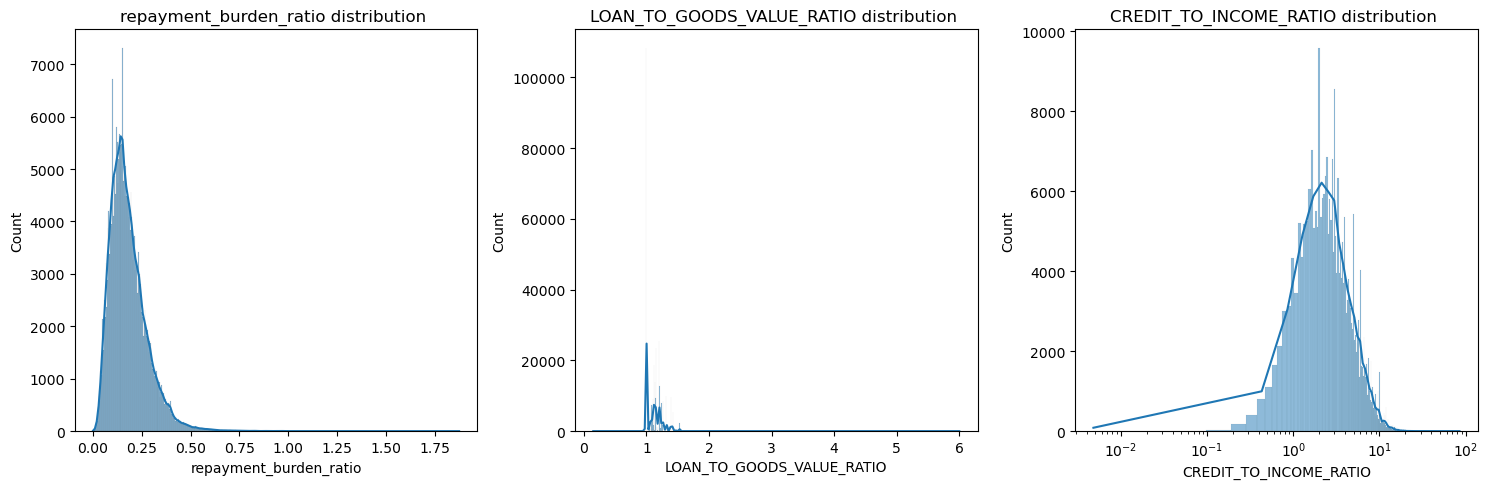

In [96]:
cols = ['repayment_burden_ratio' , 'LOAN_TO_GOODS_VALUE_RATIO' , 'CREDIT_TO_INCOME_RATIO']
fig , ax = plt.subplots(1,3 , figsize=(15,5))

for i , col in enumerate(cols):
    sns.histplot(df_repayment[col] , ax=ax[i] , kde=True)
    if col=='CREDIT_TO_INCOME_RATIO':
        ax[i].set_xscale('log')
    ax[i].set_title(f"{col} distribution ")
plt.tight_layout()
plt.show()

In [97]:
## Binned Target Rate Plot
# here we make bins and find the defualt rate per bin if defualt rate increase per bin meaning 
# the risk increases 
# As this feature increases, does the probability of default increase or not?
# but i cannot do this because i don't have target column with us

In [98]:
df_repayemnt = df_repayment.drop(columns=['repayment_burden_ratio' , 'LOAN_TO_GOODS_VALUE_RATIO' , 'CREDIT_TO_INCOME_RATIO'] , inplace=True)

## This category captures the most important risk dimension: whether the customer can afford the loan.

    Employment analysis shows that around 18% of customers are unemployed, which directly increases credit risk and marks an important high-risk             subgroup.
    Key monetary variables (AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE) are all right-skewed, which is expected in financial data.
    
    Summary observations:
    75% of customers earn less than ~2 lakh annually
    75% of customers take loans ≤ 8 lakh
    Median annuity is around 24k, with 75% paying ≤ 34k
    Median income is ~1.47 lakh, while median credit and goods price are ~5 lakh
    This indicates that many customers take loans 3×–4× their annual income, which already suggests financial stress for some borrowers.
    
    Ratio-based features
    To make repayment stress explicit, the following ratios are examined:
    a) Repayment burden ratio (annuity / income)
    50% of customers spend ≤ 16% of their income on repayments
    90% spend ≤ 30% of income
    Risk increases sharply in the 95–100 percentile, where some customers spend 50% or more of their income, and extreme cases exceed annual income           itself
    
    b) Loan-to-goods value ratio
    Most customers borrow an amount equal to or lower than the goods price
    Some cases show credit exceeding goods value, likely reflecting additional cash components or fees
    
    c) Credit-to-income ratio
    Average customer borrows 3.5×–4× income
    The top 10% borrow 10×–15× income
    Extreme cases reach very high multiples, raising serious affordability concerns
    
    These ratios clearly expose repayment stress that is not visible from raw variables alone.
    
    Decision: Repayment capacity ratios are primary risk drivers and should be prioritized in modeling.

# 3] ASSETS & WEALTH

In [418]:
assets_columns = ['SK_ID_CURR' , 'FLAG_OWN_CAR' , 'FLAG_OWN_REALTY' , 'TARGET']

df_assets = df[assets_columns].copy()

In [420]:
df_assets.head()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET
0,100002,N,Y,1
1,100003,N,N,0
2,100004,Y,Y,0
3,100006,N,Y,0
4,100007,N,Y,0


In [422]:
df_assets.head()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET
0,100002,N,Y,1
1,100003,N,N,0
2,100004,Y,Y,0
3,100006,N,Y,0
4,100007,N,Y,0


In [424]:
df_assets['assets_key'] = (df_assets['FLAG_OWN_CAR'] + '_' + df_assets['FLAG_OWN_REALTY'])

In [426]:
df_assets.head()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET,assets_key
0,100002,N,Y,1,N_Y
1,100003,N,N,0,N_N
2,100004,Y,Y,0,Y_Y
3,100006,N,Y,0,N_Y
4,100007,N,Y,0,N_Y


In [428]:
assets_map = {
    'N_N' : 'No_assets',
    'N_Y' : 'Realty only',
    'Y_N' : 'Car only',
    'Y_Y' : 'Both'
}
df_assets['assets_group'] = df_assets['assets_key'].map(assets_map)

In [430]:
df_assets.head()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,TARGET,assets_key,assets_group
0,100002,N,Y,1,N_Y,Realty only
1,100003,N,N,0,N_N,No_assets
2,100004,Y,Y,0,Y_Y,Both
3,100006,N,Y,0,N_Y,Realty only
4,100007,N,Y,0,N_Y,Realty only


In [432]:
assets_summary = (
    df_assets
    .groupby('assets_group')
    .agg(
        customers=('TARGET' , 'count'),
        Defualt_rate = ('TARGET' , 'mean')
    )
    .reset_index()
)

In [434]:
assets_summary

,assets_group,customers,Defualt_rate
0,Both,72360,0.07
1,Car only,32227,0.07
2,No_assets,61972,0.09
3,Realty only,140952,0.08


In [436]:
df_assets['assets_group'].value_counts(normalize=True)*100

assets_group
Realty only   45.84
Both          23.53
No_assets     20.15
Car only      10.48
Name: proportion, dtype: float64

In [438]:
# so overall 78 percent of the customers have some_sort of assets only 20 percent peope
# don't have assets which is risky

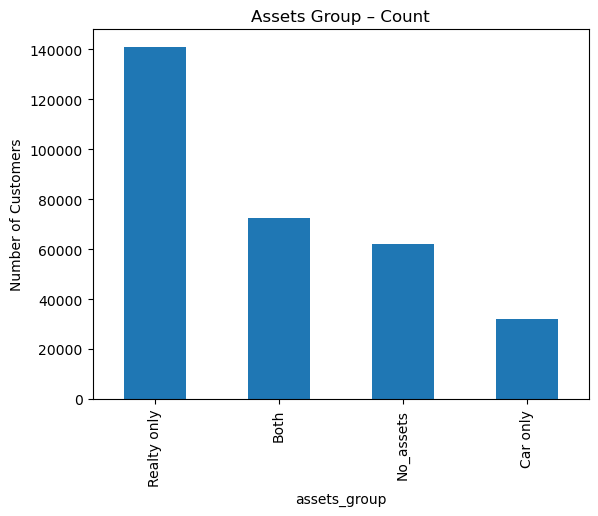

In [440]:
df_assets['assets_group'].value_counts().plot(kind='bar')
plt.title("Assets Group – Count")
plt.ylabel("Number of Customers")
plt.show()

In [442]:
df_assets.drop(columns=['TARGET' , 'assets_group' , 'assets_key'] , inplace=True)

## Customers without any assets show the highest default rates.
    Asset ownership is associated with slightly lower default risk, indicating some buffering effect.
    
    However, the overall variation in default rates across asset groups is modest.
    Assets alone are not strong discriminators of credit risk, but they add value when combined with income and repayment capacity features.
    
    Decision: Asset features are treated as supporting signals, not standalone predictors.

# 4] Credit history & External Risk

In [444]:
risk_columns =    ['SK_ID_CURR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE' ,'OBS_60_CNT_SOCIAL_CIRCLE',	'DEF_60_CNT_SOCIAL_CIRCLE' ,'DAYS_LAST_PHONE_CHANGE',	
     'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR' , 'EXT_SOURCE_1' ,'EXT_SOURCE_2'	,'EXT_SOURCE_3' , 'TARGET']

df_risk = df[risk_columns].copy()

## subgroup Social_circle_deliquency

In [162]:
df_social_circle_deliquency = df_risk[['OBS_30_CNT_SOCIAL_CIRCLE',	'DEF_30_CNT_SOCIAL_CIRCLE' ,'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE' , 'TARGET']]

In [164]:
df_social_circle_deliquency.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,TARGET
0,2.00,2.00,2.00,2.00,1
1,1.00,0.00,1.00,0.00,0
2,0.00,0.00,0.00,0.00,0
3,2.00,0.00,2.00,0.00,0
4,0.00,0.00,0.00,0.00,0


In [166]:
# if obs = 0 and def = 0 meaning clean Environment
# if obs > 0 and def =0 meaning exposure but no defualts
# if obs>0 and def>0 meaning exposure and defualt kind of mixed environment
# if def>0 high meaning very risky signal

In [168]:
df_social_circle_deliquency.isna().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
TARGET                         0
dtype: int64

In [170]:
df_social_circle_deliquency['social_60_status'] = df_social_circle_deliquency.apply(
    lambda x : 
    (
        "Clean Environment" if x['OBS_60_CNT_SOCIAL_CIRCLE']==0 and x['DEF_60_CNT_SOCIAL_CIRCLE']==0
        else
        "Exposed_but_not_defaulted" if x['OBS_60_CNT_SOCIAL_CIRCLE'] > 0 and x['DEF_60_CNT_SOCIAL_CIRCLE']==0
        else
        "Default_in_Circle"
    ),
    axis=1
) 

C:\Users\aashu\AppData\Local\Temp\ipykernel_14948\2800867090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social_circle_deliquency['social_60_status'] = df_social_circle_deliquency.apply(


In [174]:
df_social_circle_deliquency['social_60_status'].value_counts()

social_60_status
Clean Environment            164666
Exposed_but_not_defaulted    116055
Default_in_Circle             26790
Name: count, dtype: int64

In [176]:
social_60_summary = (
    df_social_circle_deliquency.
    groupby('social_60_status')['TARGET']
    .agg(
        customer = 'count',
        default_rate = 'mean'
    ).reset_index()
)

In [178]:
social_60_summary

,social_60_status,customer,default_rate
0,Clean Environment,164666,0.08
1,Default_in_Circle,26790,0.11
2,Exposed_but_not_defaulted,116055,0.08


In [180]:
df_social_circle_deliquency.drop(columns=['TARGET' , 'social_60_status'] , inplace=True)

C:\Users\aashu\AppData\Local\Temp\ipykernel_14948\3611998223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social_circle_deliquency.drop(columns=['TARGET' , 'social_60_status'] , inplace=True)


## Subgroup External_risk_Scores

In [241]:
df_external_risk = df_risk[['EXT_SOURCE_1' , 'EXT_SOURCE_2' , 'EXT_SOURCE_3' , 'TARGET']]

In [243]:
df_external_risk.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0.08,0.26,0.14,1
1,0.31,0.62,NaN,0
2,NaN,0.56,0.73,0
3,NaN,0.65,NaN,0
4,NaN,0.32,NaN,0


In [245]:
df_external_risk.isna().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
TARGET               0
dtype: int64

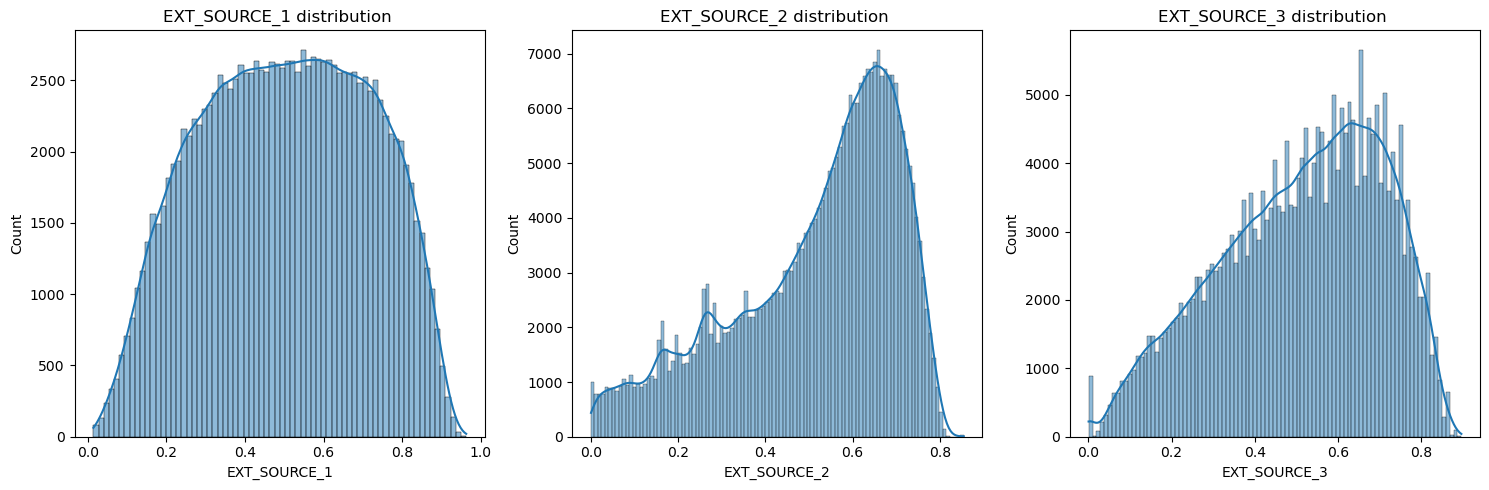

In [247]:
colss = ['EXT_SOURCE_1' ,'EXT_SOURCE_2'	,'EXT_SOURCE_3']
fig , ax = plt.subplots(1,3, figsize=(15,5))

for i , col in enumerate(colss):
    sns.histplot(df_external_risk[col] , ax=ax[i], kde=True)
    ax[i].set_title(f"{col} distribution ")
plt.tight_layout()
plt.show()

In [249]:
## Binned Target Rate Plot
# here we make bins and find the defualt rate per bin if defualt rate increase per bin meaning 
# the risk increases 
# As this feature increases, does the probability of default increase or not?

In [251]:
df_external_risk = df_external_risk.copy()

In [253]:
# binning default rate for ext_source risk_1
df_external_risk['ext1_bin'] = pd.qcut(
    df_external_risk['EXT_SOURCE_1'],
    q=10,
    duplicates='drop'
)

ext_1_default_rate = (df_external_risk.groupby('ext1_bin')['TARGET'].mean())

df_external_risk['ext2_bin'] = pd.qcut(
    df_external_risk['EXT_SOURCE_2'],
    q=10,
    duplicates='drop'
)

ext_2_default_rate = (df_external_risk.groupby('ext2_bin')['TARGET'].mean())


df_external_risk['ext3_bin'] = pd.qcut(
    df_external_risk['EXT_SOURCE_3'],
    q=10,
    duplicates='drop'
)

ext_3_default_rate = (df_external_risk.groupby('ext3_bin')['TARGET'].mean())


C:\Users\aashu\AppData\Local\Temp\ipykernel_14948\2154539598.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ext_1_default_rate = (df_external_risk.groupby('ext1_bin')['TARGET'].mean())
C:\Users\aashu\AppData\Local\Temp\ipykernel_14948\2154539598.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ext_2_default_rate = (df_external_risk.groupby('ext2_bin')['TARGET'].mean())
C:\Users\aashu\AppData\Local\Temp\ipykernel_14948\2154539598.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

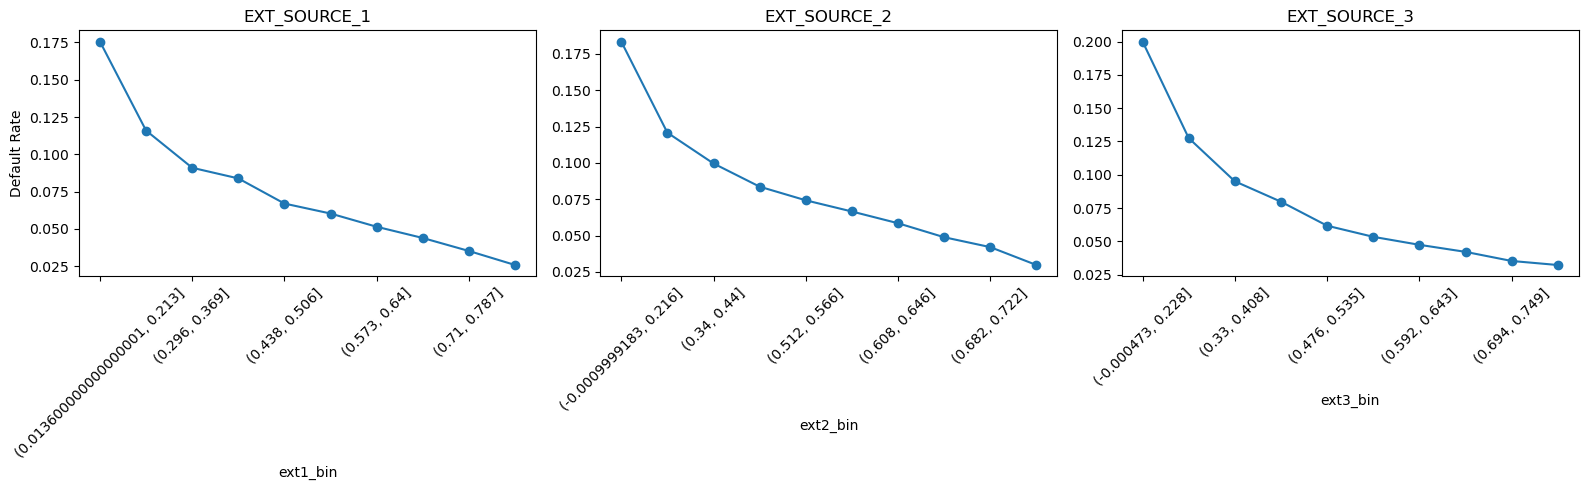

In [255]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

ext_1_default_rate.plot(ax=axes[0], marker='o')
axes[0].set_title('EXT_SOURCE_1')
axes[0].set_ylabel('Default Rate')
axes[0].tick_params(axis='x', rotation=45)

ext_2_default_rate.plot(ax=axes[1], marker='o')
axes[1].set_title('EXT_SOURCE_2')
axes[1].tick_params(axis='x', rotation=45)

ext_3_default_rate.plot(ax=axes[2], marker='o')
axes[2].set_title('EXT_SOURCE_3')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [257]:
print(ext_1_default_rate)
print('\n')
print(ext_2_default_rate)
print('\n')
print(ext_3_default_rate)

ext1_bin
(0.013600000000000001, 0.213]   0.18
(0.213, 0.296]                  0.12
(0.296, 0.369]                  0.09
(0.369, 0.438]                  0.08
(0.438, 0.506]                  0.07
(0.506, 0.573]                  0.06
(0.573, 0.64]                   0.05
(0.64, 0.71]                    0.04
(0.71, 0.787]                   0.04
(0.787, 0.963]                  0.03
Name: TARGET, dtype: float64


ext2_bin
(-0.0009999183, 0.216]   0.18
(0.216, 0.34]            0.12
(0.34, 0.44]             0.10
(0.44, 0.512]            0.08
(0.512, 0.566]           0.07
(0.566, 0.608]           0.07
(0.608, 0.646]           0.06
(0.646, 0.682]           0.05
(0.682, 0.722]           0.04
(0.722, 0.855]           0.03
Name: TARGET, dtype: float64


ext3_bin
(-0.000473, 0.228]   0.20
(0.228, 0.33]        0.13
(0.33, 0.408]        0.10
(0.408, 0.476]       0.08
(0.476, 0.535]       0.06
(0.535, 0.592]       0.05
(0.592, 0.643]       0.05
(0.643, 0.694]       0.04
(0.694, 0.749]       0.04
(0.749,

In [259]:
df_external_risk = df_external_risk.drop(
    columns=['ext1_bin', 'ext2_bin', 'ext3_bin']
)


In [263]:
df_external_risk = df_external_risk.drop(columns='TARGET')

In [265]:
df_external_risk.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.08,0.26,0.14
1,0.31,0.62,NaN
2,NaN,0.56,0.73
3,NaN,0.65,NaN
4,NaN,0.32,NaN


## subgroup Bureau request and phone_change 

In [278]:
df_bureau_phone_change = df_risk[['AMT_REQ_CREDIT_BUREAU_QRT' , 'AMT_REQ_CREDIT_BUREAU_YEAR' , 'DAYS_LAST_PHONE_CHANGE']].copy()

In [280]:
df_bureau_phone_change.head()

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE
0,0.00,1.00,"-1,134.00"
1,0.00,0.00,-828.00
2,0.00,0.00,-815.00
3,NaN,NaN,-617.00
4,0.00,0.00,"-1,106.00"


In [284]:
df_bureau_phone_change.isna().sum()

AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
DAYS_LAST_PHONE_CHANGE            1
dtype: int64

In [446]:
df_risk.drop(columns='TARGET' , inplace=True)

## This is one of the strongest feature categories in the dataset.
     External risk scores (EXT_SOURCE_1/2/3) show a clear monotonic relationship with default:
     As external score increases, default rate consistently decreases
     
     Binned analysis shows:
     Worst group: ~18 defaults per 100 customers
     Best group: ~3 defaults per 100 customers
     
     This strong separation confirms that external scores are highly informative risk indicators.
    
     Decision: External risk features are among the most important predictors in the model.

# 5] Contactbility & Digital Stability

In [448]:
df_contact = df[['SK_ID_CURR','FLAG_MOBIL' ,'FLAG_EMP_PHONE' , 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE' , 'FLAG_PHONE' ,'FLAG_EMAIL' , 'TARGET']].copy()

In [450]:
df_contact.head()

,SK_ID_CURR,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,100002,1,1,0,1,1,0,1
1,100003,1,1,0,1,1,0,0
2,100004,1,1,1,1,1,0,0
3,100006,1,1,0,1,0,0,0
4,100007,1,1,0,1,0,0,0


In [452]:
# this table answers just one question how reachable the person is 

In [454]:
df_contact[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
            'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']].mean()


FLAG_MOBIL         1.00
FLAG_EMP_PHONE     0.82
FLAG_WORK_PHONE    0.20
FLAG_CONT_MOBILE   1.00
FLAG_PHONE         0.28
FLAG_EMAIL         0.06
dtype: float64

In [456]:
df_contact['CONTACT_COUNT'] = (
    df_contact['FLAG_MOBIL'] +
    df_contact['FLAG_EMP_PHONE'] +
    df_contact['FLAG_WORK_PHONE'] +
    df_contact['FLAG_PHONE'] +
    df_contact['FLAG_EMAIL']
)
df_contact.groupby('CONTACT_COUNT')['TARGET'].mean()


CONTACT_COUNT
1   0.06
2   0.08
3   0.08
4   0.08
5   0.09
Name: TARGET, dtype: float64

In [458]:
# NOTHING STABLE IN THIS CATEGORY I MEAN IT'S A WEEK CATEGORIES IT DOSENT TELL 
# MUCH ABOUT DEFUALT BEHAVIOR

In [460]:
df_contact.drop(columns=['TARGET' , 'CONTACT_COUNT'] , inplace=True)

## These features capture how reachable a customer is via phone or email.

    Analysis shows no strong or consistent separation between defaulters and non-defaulters.
    The signal is weak and mostly supportive.
    
    Decision: Contactability features have low standalone predictive value.

# 6] Address & work location Consistency

In [464]:
df_address_consistency = df[['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION',	'REG_REGION_NOT_WORK_REGION' ,'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',	
      'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY' , 'REGION_RATING_CLIENT'	,'REGION_RATING_CLIENT_W_CITY' , 'TARGET' ]].copy()

In [466]:
df_address_consistency.head()

,SK_ID_CURR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,TARGET
0,100002,0,0,0,0,0,0,2,2,1
1,100003,0,0,0,0,0,0,1,1,0
2,100004,0,0,0,0,0,0,2,2,0
3,100006,0,0,0,0,0,0,2,2,0
4,100007,0,0,0,0,1,1,2,2,0


In [468]:
df_address_consistency[
    [
        'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY',
        'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY'
    ]
].mean()


REG_REGION_NOT_LIVE_REGION    0.02
REG_REGION_NOT_WORK_REGION    0.05
LIVE_REGION_NOT_WORK_REGION   0.04
REG_CITY_NOT_LIVE_CITY        0.08
REG_CITY_NOT_WORK_CITY        0.23
LIVE_CITY_NOT_WORK_CITY       0.18
dtype: float64

In [470]:
# there is a very low region level mismatches and slight hihger city level mismatches

In [472]:
df_address_consistency['LOCATION_MISMATCH_COUNT'] = (
    df_address_consistency['REG_REGION_NOT_LIVE_REGION'] +
    df_address_consistency['REG_REGION_NOT_WORK_REGION'] +
    df_address_consistency['LIVE_REGION_NOT_WORK_REGION'] +
    df_address_consistency['REG_CITY_NOT_LIVE_CITY'] +
    df_address_consistency['REG_CITY_NOT_WORK_CITY'] +
    df_address_consistency['LIVE_CITY_NOT_WORK_CITY']
)


In [474]:
df_address_consistency.groupby('LOCATION_MISMATCH_COUNT')['TARGET'].mean()


LOCATION_MISMATCH_COUNT
0   0.07
1   0.09
2   0.10
3   0.12
4   0.10
5   0.11
6   0.10
Name: TARGET, dtype: float64

In [476]:
df_address_consistency.drop(columns=('TARGET') , inplace=True)

## Region-level mismatches are rare, while city-level mismatches occur more frequently.
    As the number of mismatches increases, default rates increase gradually, though not sharply.
    
    This suggests that residential and employment instability contributes to risk, but the effect size is moderate.
    
    Decision: Geographic consistency is a secondary risk signal

# 7] Application behavior & timing

In [478]:
df_application_beh_timing = df[['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START' ,'HOUR_APPR_PROCESS_START' , 'TARGET']].copy()

In [480]:
df_application_beh_timing.head()

,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,TARGET
0,100002,WEDNESDAY,10,1
1,100003,MONDAY,11,0
2,100004,MONDAY,9,0
3,100006,WEDNESDAY,17,0
4,100007,THURSDAY,11,0


In [482]:
df_application_beh_timing['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True)

WEEKDAY_APPR_PROCESS_START
TUESDAY     0.18
WEDNESDAY   0.17
MONDAY      0.16
THURSDAY    0.16
FRIDAY      0.16
SATURDAY    0.11
SUNDAY      0.05
Name: proportion, dtype: float64

In [484]:
df_application_beh_timing.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].mean()

WEEKDAY_APPR_PROCESS_START
FRIDAY      0.08
MONDAY      0.08
SATURDAY    0.08
SUNDAY      0.08
THURSDAY    0.08
TUESDAY     0.08
WEDNESDAY   0.08
Name: TARGET, dtype: float64

In [486]:
df_application_beh_timing.groupby('HOUR_APPR_PROCESS_START')['TARGET'].mean()

HOUR_APPR_PROCESS_START
0    0.15
1    0.08
2    0.10
3    0.09
4    0.08
5    0.11
6    0.11
7    0.10
8    0.09
9    0.08
10   0.08
11   0.08
12   0.08
13   0.08
14   0.08
15   0.08
16   0.07
17   0.06
18   0.07
19   0.07
20   0.07
21   0.06
22   0.10
23   0.12
Name: TARGET, dtype: float64

In [488]:
df_application_beh_timing.drop(columns = ['TARGET'] , inplace=True)

In [490]:
df_quality_life = df[['SK_ID_CURR','APARTMENTS_AVG' , 'YEARS_BUILD_AVG' , 'ELEVATORS_AVG' , 'LANDAREA_AVG']].copy()			

## Application weekday and hour show no meaningful variation in default rates.
    These features do not provide useful predictive information. 
    Decision: Application timing features are low value and can be deprioritized.

# EDA process is done for all categories 

# Feature Consolidation

In [492]:
df_identity.sample(2)

,SK_ID_CURR,CODE_GENDER,AGE,EDUCATION GROUP,FAMILY_STATUS,CNT CHILDREN
263037,404582,F,23,Higher Education,Single,0
277089,421109,F,46,Medium Education,Partnered,0


In [494]:
df_repayment.head(2)

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,ORGANIZATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,repayment_burden_ratio,LOAN_TO_GOODS_VALUE_RATIO,CREDIT_TO_INCOME_RATIO
0,100002,"202,500.00","406,597.50","24,700.50","351,000.00",Business Entity Type 3,-637,Laborers,0.12,1.16,2.01
1,100003,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",School,-1188,Core staff,0.13,1.15,4.79


In [496]:
df_assets.sample(2)

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY
192915,323715,Y,N
135267,256889,Y,N


In [498]:
df_risk.sample(2)

,SK_ID_CURR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
270900,414044,3.00,0.00,3.00,0.00,0.00,0.00,6.00,0.26,0.27,0.33
179227,307684,0.00,0.00,0.00,0.00,"-2,429.00",0.00,3.00,0.65,0.71,0.55


In [500]:
df_contact.sample(2)

,SK_ID_CURR,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
49878,157737,1,0,0,1,0,0
96083,211546,1,1,1,1,0,0


In [502]:
df_address_consistency.sample(2)

,SK_ID_CURR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,LOCATION_MISMATCH_COUNT
293678,440240,0,0,0,0,0,0,3,3,0
290221,436224,0,0,0,0,0,0,2,2,0


In [504]:
df_application_beh_timing.sample(2)

,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
29756,134550,MONDAY,17
92339,207223,WEDNESDAY,12


In [506]:
df_quality_life.sample(2)

,SK_ID_CURR,APARTMENTS_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,LANDAREA_AVG
232997,369865,NaN,NaN,NaN,NaN
45037,152173,0.01,NaN,0.00,0.00


In [508]:
print(df_identity.shape)
print(df_repayment.shape)
print(df_assets.shape)
print(df_risk.shape)
print(df_contact.shape)
print(df_address_consistency.shape)
print(df_application_beh_timing.shape)
print(df_quality_life.shape)

(307511, 6)
(307511, 11)
(307511, 3)
(307511, 11)
(307511, 7)
(307511, 10)
(307511, 3)
(307511, 5)


In [514]:
dfs=[
    df_identity,
    df_repayment,
    df_assets,
    df_risk,
    df_contact,
    df_address_consistency,
    df_application_beh_timing,
    df_quality_life
    
]
dfs = [df.set_index('SK_ID_CURR') for df in dfs]

In [530]:
from functools import reduce

In [534]:
df_model = reduce(
    lambda left,right : left.join(right , how='inner'),
    dfs
)

In [572]:
df_model.head()

,CODE_GENDER,AGE,EDUCATION GROUP,FAMILY_STATUS,CNT CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,ORGANIZATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,repayment_burden_ratio,LOAN_TO_GOODS_VALUE_RATIO,CREDIT_TO_INCOME_RATIO,FLAG_OWN_CAR,FLAG_OWN_REALTY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,LOCATION_MISMATCH_COUNT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,M,25,Medium Education,Single,0,"202,500.00","406,597.50","24,700.50","351,000.00",Business Entity Type 3,-637,Laborers,0.12,1.16,2.01,N,Y,2.00,2.00,2.00,2.00,"-1,134.00",0.00,1.00,0.08,0.26,0.14,1,1,0,1,1,0,0,0,0,0,0,0,2,2,0,WEDNESDAY,10,1
100003,F,45,Higher Education,Partnered,0,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",School,-1188,Core staff,0.13,1.15,4.79,N,N,1.00,0.00,1.00,0.00,-828.00,0.00,0.00,0.31,0.62,NaN,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,MONDAY,11,0
100004,M,52,Medium Education,Single,0,"67,500.00","135,000.00","6,750.00","135,000.00",Government,-225,Laborers,0.10,1.00,2.00,Y,Y,0.00,0.00,0.00,0.00,-815.00,0.00,0.00,NaN,0.56,0.73,1,1,1,1,1,0,0,0,0,0,0,0,2,2,0,MONDAY,9,0
100006,F,52,Medium Education,Partnered,0,"135,000.00","312,682.50","29,686.50","297,000.00",Business Entity Type 3,-3039,Laborers,0.22,1.05,2.32,N,Y,2.00,0.00,2.00,0.00,-617.00,NaN,NaN,NaN,0.65,NaN,1,1,0,1,0,0,0,0,0,0,0,0,2,2,0,WEDNESDAY,17,0
100007,M,54,Medium Education,Single,0,"121,500.00","513,000.00","21,865.50","513,000.00",Religion,-3038,Core staff,0.18,1.00,4.22,N,Y,0.00,0.00,0.00,0.00,"-1,106.00",0.00,0.00,NaN,0.32,NaN,1,1,0,1,0,0,0,0,0,0,1,1,2,2,2,THURSDAY,11,0


In [542]:
# i am gonna drop the last 4 columns because they are very weak signal and plus they have very highmissng values

In [544]:
df_model.drop(columns=['APARTMENTS_AVG' , 'YEARS_BUILD_AVG' , 'ELEVATORS_AVG' , 'LANDAREA_AVG'] , inplace=True)

In [570]:
df_model.isna().sum()

CODE_GENDER                         0
AGE                                 0
EDUCATION GROUP                     0
FAMILY_STATUS                       0
CNT CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
ORGANIZATION_TYPE                   0
DAYS_EMPLOYED                       0
OCCUPATION_TYPE                 96391
repayment_burden_ratio             12
LOAN_TO_GOODS_VALUE_RATIO         278
CREDIT_TO_INCOME_RATIO              0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
DAYS_LAST_PHONE_CHANGE              1
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_YEAR      41519
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3

## After evaluating all feature groups, relevant variables are merged into a single modeling dataset.
## This process reduces the feature count from ~120 to 44, focusing on features with clearer risk relevance.

# train Test split

In [556]:
from sklearn.model_selection import train_test_split

In [566]:
df_model['TARGET'] = df.set_index('SK_ID_CURR').loc[df_model.index , 'TARGET']

In [574]:
df_model.shape

(307511, 45)

In [576]:
x = df_model.iloc[:,0:44]

In [586]:
y = df_model['TARGET']

In [588]:
x_train , x_test , y_train , y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state = 42,
    stratify=y
)

In [592]:
df_model.dtypes

CODE_GENDER                     object
AGE                              int64
EDUCATION GROUP                 object
FAMILY_STATUS                   object
CNT CHILDREN                    object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
ORGANIZATION_TYPE               object
DAYS_EMPLOYED                    int64
OCCUPATION_TYPE                 object
repayment_burden_ratio         float64
LOAN_TO_GOODS_VALUE_RATIO      float64
CREDIT_TO_INCOME_RATIO         float64
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
EXT_SOURCE_1                   float64
EXT_SOURCE_2             

In [594]:
binary_map = {'Y': 1, 'N': 0}
for col in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    x_train[col] = x_train[col].map(binary_map)
    x_test[col] = x_test[col].map(binary_map)


In [604]:
import numpy as np

In [606]:
x_train['DAYS_EMPLOYED'] = x_train['DAYS_EMPLOYED'].replace(365243, np.nan)
x_test['DAYS_EMPLOYED'] = x_test['DAYS_EMPLOYED'].replace(365243, np.nan)


# Preprocessing & Model training Pipeline

In [608]:
x_train.head(2)

,CODE_GENDER,AGE,EDUCATION GROUP,FAMILY_STATUS,CNT CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,ORGANIZATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,repayment_burden_ratio,LOAN_TO_GOODS_VALUE_RATIO,CREDIT_TO_INCOME_RATIO,FLAG_OWN_CAR,FLAG_OWN_REALTY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,LOCATION_MISMATCH_COUNT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
310536,F,33,Higher Education,Partnered,1-2,"90,000.00","227,520.00","13,189.50","180,000.00",Business Entity Type 2,-946.00,Laborers,0.15,1.26,2.53,0,0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.38,0.29,0.62,1,1,0,1,0,0,0,0,0,0,0,0,2,2,0,WEDNESDAY,10
365516,M,42,Medium Education,Partnered,0,"90,000.00","161,730.00","13,095.00","135,000.00",Other,-92.00,Drivers,0.15,1.20,1.80,1,1,2.00,0.00,2.00,0.00,-509.00,NaN,NaN,NaN,0.51,NaN,1,1,0,1,0,0,0,0,0,0,1,1,3,3,2,TUESDAY,13


In [623]:
df_model['EDUCATION GROUP'].value_counts()

EDUCATION GROUP
Medium Education    218391
Higher Education     75027
Low Education        14093
Name: count, dtype: int64

In [627]:
numeric_cols = ['AGE','AMT_INCOME_TOTAL' , 'AMT_CREDIT' ,'AMT_ANNUITY' , 'AMT_GOODS_PRICE' , 'DAYS_EMPLOYED','repayment_burden_ratio' , 'LOAN_TO_GOODS_VALUE_RATIO',
               'CREDIT_TO_INCOME_RATIO' ,'FLAG_OWN_CAR' , 'FLAG_OWN_REALTY', 'OBS_30_CNT_SOCIAL_CIRCLE' , 'DEF_30_CNT_SOCIAL_CIRCLE' , 'OBS_60_CNT_SOCIAL_CIRCLE' ,'DEF_60_CNT_SOCIAL_CIRCLE',
               'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT' , 'AMT_REQ_CREDIT_BUREAU_YEAR' , 'EXT_SOURCE_1'	,'EXT_SOURCE_2','EXT_SOURCE_3',
               'FLAG_MOBIL', 	'FLAG_EMP_PHONE' ,	'FLAG_WORK_PHONE'	, 'FLAG_CONT_MOBILE' ,	'FLAG_PHONE' ,'FLAG_EMAIL'
               ,'REG_REGION_NOT_LIVE_REGION'	,'REG_REGION_NOT_WORK_REGION',	'LIVE_REGION_NOT_WORK_REGION'	,'REG_CITY_NOT_LIVE_CITY' , 'REG_CITY_NOT_WORK_CITY',	
               'LIVE_CITY_NOT_WORK_CITY' ,	'REGION_RATING_CLIENT'	, 'REGION_RATING_CLIENT_W_CITY'	, 'LOCATION_MISMATCH_COUNT' ,'HOUR_APPR_PROCESS_START']


nominal_cols =['CODE_GENDER' ,'CNT CHILDREN', 'FAMILY_STATUS' , 'ORGANIZATION_TYPE' , 'OCCUPATION_TYPE' , 'WEEKDAY_APPR_PROCESS_START','EDUCATION GROUP']

In [621]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder, StandardScaler 
from sklearn.pipeline import Pipeline

In [625]:
from sklearn.linear_model import LogisticRegression

In [629]:
numeric_pipeline = Pipeline(steps=[
    ('impute' , SimpleImputer(strategy='median')),
    ('scale' , StandardScaler())
])

nominal_pipeline = Pipeline(steps=[
    ('impute' , SimpleImputer(strategy='most_frequent')),
    ('ohe' , OneHotEncoder(handle_unknown='ignore'))
])



In [635]:
model_training = LogisticRegression(
    max_iter = 1000,
    class_weight = 'balanced'
)

In [631]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric' , numeric_pipeline , numeric_cols),
        ('nominal' , nominal_pipeline , nominal_cols)
    ]
)

In [637]:
final_pipeline = Pipeline(steps=[
    ('preprocessing' , preprocessor),
    ('model_training' , model_training)
])

In [639]:
final_pipeline.fit(x_train , y_train)

,steps,"[('preprocessing', ...), ('model_training', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('nominal', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Model Evauluation 

In [643]:
y_pred = final_pipeline.predict(x_test)

In [645]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_auc_score

In [647]:
print("Accuracy of model(misleadin though)" , accuracy_score(y_test , y_pred))

Accuracy of model(misleadin though) 0.689283449587825


In [653]:
print("Confusion matrix\n" , confusion_matrix(y_test , y_pred))

Confusion matrix
 [[39049 17489]
 [ 1621  3344]]


In [649]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.67      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503



In [657]:
y_prob = final_pipeline.predict_proba(x_test)[:, 1]

In [659]:
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

ROC-AUC: 0.7456769639768877


In [667]:
x_test.shape

(61503, 44)

## The baseline model achieves:
    Accuracy: ~69% (not emphasized)
    Recall (defaulters): ~67%
    Precision: ~16%
    ROC-AUC: ~74%
    
    Low precision is expected and acceptable in this context, as:
    False positives can be handled via manual review
    False negatives (missed defaulters) are more costly
    
    ROC-AUC of 74% indicates that the model ranks a random defaulter higher than a non-defaulter 74% of the time.
    
    Cross-validation shows consistent performance across folds with low variance, suggesting stable generalization.

# using different model for reference

In [674]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=50,
    min_samples_split=500,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


tree_pipeline = Pipeline(steps=[
    ('preprocessing' , preprocessor),
    ('model_trianing' , rf_model)
])

In [676]:
tree_pipeline.fit(x_train, y_train)

,steps,"[('preprocessing', ...), ('model_trianing', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('nominal', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [678]:
y_prob_rf = tree_pipeline.predict_proba(x_test)[:, 1]

# Metrics
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest ROC-AUC:", roc_auc_rf)

Random Forest ROC-AUC: 0.7440025632040221


In [ ]:
since both logistic regression and random forest have same roc(almost) this tells very important
thing about my dataset which is mostly all signals in my dataset are linearly/monotonic
and this is where logistic regression works well there are no strong non linear interactions
for RF to exploit beyond what logistic already captures

so i think logistic regression is the model i am moving with

# back to logistic REgression (cross val and threshold tuning)

### cross validation score

In [683]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_scores = cross_val_score(
    final_pipeline,        # logistic regression pipeline
    x_train,
    y_train,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

print("CV ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())
print("Std ROC-AUC:", cv_scores.std())

CV ROC-AUC scores: [0.74348831 0.74219753 0.74767551 0.74422812 0.74390906]
Mean ROC-AUC: 0.7442997042539796
Std ROC-AUC: 0.0018238039269473977


In [ ]:
The logistic regression model demonstrates consistent and stable discriminatory power across folds, with 
a mean ROC-AUC of ~0.744 and low variance, indicating robust generalization.

### threshold tuning

In [687]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

y_prob_1 = final_pipeline.predict_proba(x_test)[:, 1]

thresholds = np.arange(0.05, 0.31, 0.05)

for t in thresholds:
    y_pred_t = (y_prob_1 >= t).astype(int)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Precision={precision:.3f} | Recall={recall:.3f}")


Threshold=0.05 | Precision=0.081 | Recall=1.000
Threshold=0.10 | Precision=0.082 | Recall=0.998
Threshold=0.15 | Precision=0.085 | Recall=0.989
Threshold=0.20 | Precision=0.091 | Recall=0.975
Threshold=0.25 | Precision=0.098 | Recall=0.947
Threshold=0.30 | Precision=0.108 | Recall=0.915


In [ ]:
After confirming model stability via cross-validation, decision threshold tuning was
performed to understand the trade-off between precision and recall. Lower thresholds resulted 
in near-perfect recall but low precision due to the low base default rate (~8%). Even at higher
thresholds (0.25–0.30), recall remained above 90%, while precision improved gradually.
This indicates that the model separates default risk smoothly rather than sharply,
which is typical for application-only credit data. The model is therefore better interpreted 
as a risk-ranking tool rather than a strict classifier.
Threshold selection is deferred until risk-bucket analysis is performed.

# Risk bucket analysis

In [690]:
import pandas as pd

df_risk = pd.DataFrame({
    'risk_score': y_prob,
    'TARGET': y_test.values
})

df_risk['risk_decile'] = pd.qcut(
    df_risk['risk_score'],
    q=10,
    labels=False
)

decile_summary = (
    df_risk
    .groupby('risk_decile')
    .agg(
        customers=('TARGET', 'count'),
        default_rate=('TARGET', 'mean')
    )
    .sort_index(ascending=False)   # highest risk first
)

decile_summary


,customers,default_rate
risk_decile,,
9,6151,0.26
8,6150,0.14
7,6150,0.11
6,6150,0.08
5,6150,0.06
4,6151,0.05
3,6150,0.04
2,6150,0.03
1,6150,0.02


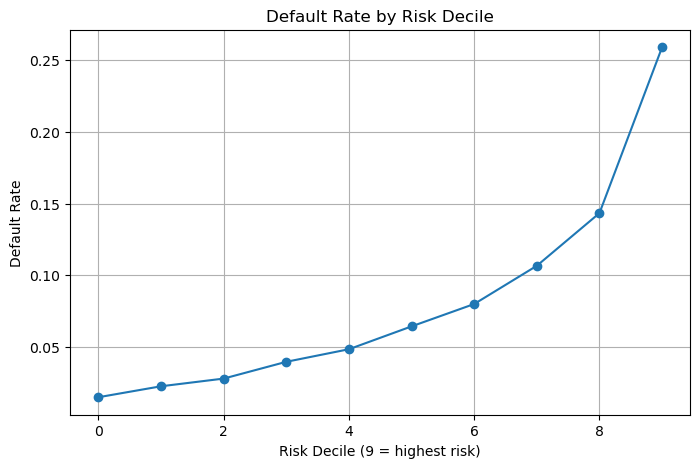

In [692]:
plt.figure(figsize=(8,5))
plt.plot(decile_summary.index, decile_summary['default_rate'], marker='o')
plt.xlabel('Risk Decile (9 = highest risk)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Risk Decile')
plt.grid(True)
plt.show()


## Risk decile analysis shows strong monotonic separation:

    Top decile default rate ≈ 26%
    Bottom decile default rate ≈ 1%
    
    Default rate decreases consistently across deciles
    
    This confirms that the model functions well as a risk-ranking (scoring) model, suitable for risk-based decisioning rather than binary approval           decisions.
    
    Final Decision: The model is appropriate for application scoring and prioritization, not as a hard accept/reject rule.

# How this model can be used in practice